In [1]:
!pip install matplotlib deap

import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.2 MB/s eta 0:00:00


In [2]:
num_locations = 20
locations = [(random.randint(0, 100), random.randint(0, 100)) for _ in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0, -1.0))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [4]:
def evalVRP(individual):
    total_distance = 0
    distances = []

    for i in range(num_vehicles):

        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]

        vehicle_distance = sum(
            np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k]))
            for k in range(len(vehicle_route) - 1)
        )

        total_distance += vehicle_distance
        distances.append(vehicle_distance)

    balance_penalty = np.std(distances)
    return total_distance, balance_penalty

In [5]:
toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

In [6]:
def plot_routes(individual, title="Routes"):
    plt.figure(figsize=(10, 8))

    for (x, y) in locations:
        plt.plot(x, y, 'bo')
    plt.plot(depot[0], depot[1], 'rs')

    for i in range(num_vehicles):
        vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
        x_coords, y_coords = zip(*vehicle_route)
        plt.plot(x_coords, y_coords, '-', label=f"Vehicle {i+1}")

    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    #plt.legend()
    #plt.grid()
    plt.show()

gen	nevals	avg    	min    
0  	300   	577.422	4.36261
1  	213   	556.575	1.74726
2  	243   	548.481	2.0396 
3  	232   	542.672	1.39801
4  	233   	534.051	4.42126
5  	218   	524.981	3.12824
6  	213   	518.455	3.85078
7  	233   	518.226	5.25206
8  	219   	508.306	4.88284
9  	209   	495.323	1.91747
10 	224   	484.098	1.83243
11 	230   	472.365	1.29027
12 	230   	454.876	6.47176
13 	217   	438.337	6.73773
14 	231   	426.413	4.7994 
15 	250   	416.6  	6.23215
16 	238   	406.451	2.88765
17 	236   	400.851	4.22188
18 	225   	393.683	4.22188
19 	225   	390.002	2.82479
20 	209   	382.105	5.63405
21 	232   	377.051	11.542 
22 	237   	367.473	7.29098
23 	217   	365.23 	0.809107
24 	227   	361.094	11.5603 
25 	246   	357.939	3.93189 
26 	233   	349.954	12.6423 
27 	219   	345.305	8.0142  
28 	229   	342.694	6.97208 
29 	223   	338.604	4.05561 
30 	238   	339.399	3.20633 
Best Individual (Route Representation): [5, 15, 13, 19, 9, 11, 10, 14, 2, 17, 8, 16, 12, 1, 0, 6, 7, 18, 3, 4]
Best Fitness (Tot

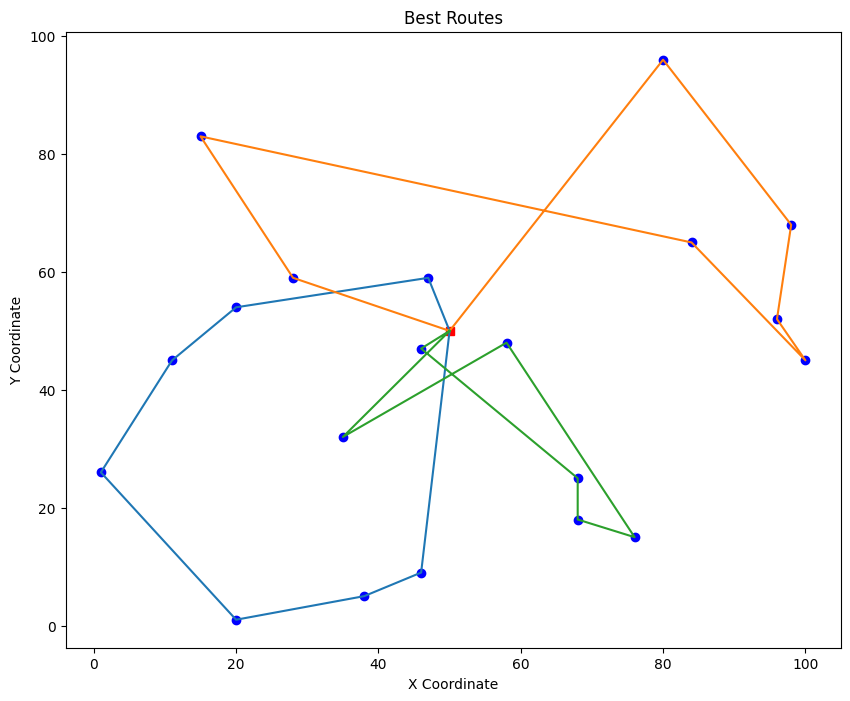

In [7]:
def main():
    random.seed(42)
    pop = toolbox.population(n=300)
    hof = tools.HallOfFame(1)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)


    algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=30, stats=stats, halloffame=hof)

    return pop, stats, hof

if __name__ == "__main__":

    population, statistics, hall_of_fame = main()

    print("Best Individual (Route Representation):", hall_of_fame[0])
    print("Best Fitness (Total Distance, Balance Penalty):", hall_of_fame[0].fitness.values)

    plot_routes(hall_of_fame[0], title="Best Routes")